# <font color='darkred'><center> Jupyter Notebook </center></font>
<img style="float: right;" src = "files/logo_unifi.png" width="200"/>
The IPython Notebook, known as Jupyter Notebook,
is an interactive computational environment, in which we can combine code execution, text, mathematics, plots and media. 
We used it, not only because it was recommended for the project, but also because it is very useful to provide a full data analysis that could be easily read. In fact we could interleave documentation (such as explanations or comments) and code.


#  <font color='darkblue'><center> Exploring Covid-19 through Italy regions and provinces datasets </center></font>
# <font color='darkred'> Authors </font> 

## Martina Pacifici
Born on 07/09/1995 in Castiglion Fiorentino (AR). She learnt English, German and Spanish in High School. She got an Economics Bachelor's degree at the Univeristy of Florence in April 2018. Now she is attending there the second year of the Statistics master degree.

## Federica Sauro Graziano
Born on 16/01/1994 in Florence (FI). She attended scientific High School "Castelnuovo" in Florence. She got the Statistics Bachelor's degree at the Univeristy of Florence in July 2017. Now she is finishing there the last year of master degree in Statistic. 

# <font color='darkred'>Quick summary</font>

First we import the two dataset: r will be regions dataset, while p provinces dataset of Italy.

This two are taken from Civil protection's account on github website:
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json
- https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json

The collaborators and mantainers, who daily update the datasets at 06:30 p.m., are Umberto Rosini and Pierluigi Cara. They started to load data from 7th of March 2020 and they will stop on the 31th of July 2020.

We downloaded the data on the morning of the 1st of July, so in our dataset we have data from the 24th of Febraury 2020 to the 30th of June.

Each dataset is an everyday collection of data regarding Covid-19 at Italy regions and provinces level, so that we have a hierarchical structure: regions are the macro-level and each region has more provinces, while provinces are the micro-level and each province belongs to just one region.

Now we'll provide some descriptions of the two datasets:
## Regions
The shape of the dataset is 2688 rows x 21 columns.

Each row is a region at a particular day (date is recored as 'data') and for each region we have several information.

- **Attributes referred to geographic issues**: 
    
    - 'stato': ITA for each row (we have only Italy regions)
    - 'codice_regione': numerical unique code for each region
    - 'denominazione_regione': name of the region
    - 'lat': latitude in decimal degree
    - 'long': longitude in decimal degree
   
    We observed that latitude and longitude refers to the ones of the regional capital (i.e. latitude and longitude of Tuscany are the same of Florence in the provinces dataset). 
   
- **Attributes reffered to covid-19 development**: 
    
    - 'ricoverati_con_sintomi': cases hospedalized with symptoms of covid-19
    - 'terapia_intensiva': cases hospedalized in the intensive care unit 
    - 'totale_ospedalizzati': total cases hospedalized
    - 'isolamento_domiciliare': home isolation cases
    - 'totale_positivi': total positive cases ('ricoverati_con_sintomi' + 'terapia_intensiva' + 'isolamento_domiciliare')
    - 'variazione_totale_positivi': change in positive cases
    - 'nuovi_positivi': new positive cases
    - 'dimessi_guariti': discharged healed cases from the hospital
    - 'deceduti': death cases
    - 'casi_da_sospetto_diagnostico': positive cases (to the swab) from the ones reported from clinical activity
    - 'casi_da_screening': positive cases (to the swab) from the screening test
    - 'totale_casi': total cases ('totale_positivi' + 'dimessi_guariti' + 'deceduti')
    - 'tamponi': number of swabs
    - 'casi_testati': tested cases
    - 'note': some notes specific for very few region (only 6 are different from **None**)
    
## Provinces
The shape of the dataset is 16510 rows x 11 columns.

Each row is a province at a particular day (date is recored as 'data') and for each province we have several information.
   
- **Attributes referred to geographic issues**: 
    
    - 'stato': ITA for each row (we have only Italy provinces)
    - 'codice_regione': numerical unique code for each region the province belongs to
    - 'denominazione_regione': name of the region the province belongs to
    - 'codice_provincia': numerical unique code for each province
    - 'denominazione_provincia': name of the province
    - 'sigla_provincia': provincial acronym
    - 'lat': latitude in decimal degree referred to the province
    - 'long': longitude in decimal degree referred to the province
    

- **Attributes reffered to covid-19 development**: 
    - 'totale_casi': total cases (computed in the same way as regions, even if we don't have the other attributes in this dataset)
    - 'note': some notes specific for very few provinces (only 6 are different from **None**)

In [128]:
import json
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-regioni.json") as f1:
   
        r = json.load(f1)

In [129]:
with open("C:\\Users\\feder\\OneDrive\\Documenti\\Fede\\University\\STAT_M1\\AlgoritmiPython\\project\\dpc-covid19-ita-province2.json") as f2:

        p = json.load(f2)

# <font color='darkred'>Libraries</font>
- numpy: provides an efficient interface to store and manipulate numerical arrays, in particular when arrays grow larger size
- pandas: is useful for manipulation of data and it creates Pandas objects, that are structures in which the rows and columns are identified with labels. In our analysis we used most its object DataFrame
- matplotlib.pyplot: is a multi-platform data visualization and we used it to create several plots
- seaborn: is a python data visualization library based on matplotlib
- geopandas: is a library to deal with geospatial data. To use geopandas we needed also gdal and shapely to open shapefiles, fiona for file access, descartes and matplotlib to visualize data
- datetime, dateutil and parser: are useful libraries to deal with dates


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import fiona
import shapely
import gdal
import descartes
from datetime import datetime
from dateutil import parser

# <font color='darkred'>Data manipulation</font>

We trasformed our datasets in objects DataFrame throught **pandas**

In [26]:
regioni = pd.DataFrame(r)
province = pd.DataFrame(p)

Here we verified if there were some null values that we didn't want.

Regarding the "regioni" DataFrame there were no null values. 

In [27]:
regioni.isnull()
sum(regioni.codice_regione.isnull())
sum(regioni.lat.isnull())
sum(regioni.long.isnull())

0

Regarding the "province" DataFrame there were some provinces that were "In fase di definizione/aggiornamento" that had **NaN** values in 'sigla_provincia', 'lat' and 'long', so we simply dropped these.

With the command *dropna* we dropped all the row with **NaN** values by selecting just one column of our choice.

In [28]:
province = province.dropna(subset=['sigla_provincia'])

Here we just reset the index to have an ordered one.

In [29]:
province = province.reset_index()
province = province.drop("index", axis = 1)

Below we inserted some adding information to the 'regioni' dataset. 

The first one is the zone where the regions belong to (which is naturally the same for their provinces and we will see later how to have this information for the provinces level too).

The other informations are two ratios that will be shown in the data visualization.

In [30]:
#zones
centro = ['Lazio', 'Marche','Toscana', 'Umbria']
nord = ['Friuli Venezia Giulia', 'Emilia-Romagna',  "Valle d'Aosta", 'Liguria',
       'Veneto','P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Lombardia']
sud = ['Molise', 'Calabria', 'Campania',  'Basilicata',  'Puglia' ,'Abruzzo']
isole = ['Sardegna', 'Sicilia']
zona = []
for el in regioni.denominazione_regione:
    if el in centro:
        zona.append('centro')
    if el in nord:
        zona.append('nord')
    if el in sud:
        zona.append('sud')
    if el in isole:
        zona.append('isole')

regioni['zone'] = zona

#ratios
regioni['perc_dec'] = regioni['deceduti'] / regioni['totale_casi']
regioni['terInt_osp'] = regioni['terapia_intensiva'] / regioni['totale_ospedalizzati']

## Date format

We focused on extrapolating the date to have some adding information of the timing of the analysis.

First we just had the string date and we thought how to convert it in a date format, and finally in each dataset we added three new columns, one is the converted date, the second is to record the month the date refers to, and the last one is to record the week of the year.

In [31]:
date_new_r = []
month_r = []
week_r = []

date_new_p = []
month_p = []
week_p = []

new_format = "%Y-%m-%d-%U"
month_format = "%m"
week_format = "%U"

for s in regioni.data:
    date_new_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))
    month_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(month_format))
    week_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(week_format))

for s in province.data:
    date_new_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))
    month_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(month_format))
    week_p.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(week_format))

regioni['new_date']=date_new_r
regioni['month']=month_r
regioni['week']=week_r

province['new_date']=date_new_p
province['month']=month_p
province['week']=week_p

We also tried to change the date format through the list comprehension but we noticed that the time cost is almost the same in respet to the for cycle with the *append* function, so we decided to leave this last one method.

In [32]:
%%timeit
data_new_r2 = [datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format) for s in regioni.data]

102 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%%timeit
for s in regioni.data:
    date_new_r.append(datetime.strptime(s,"%Y-%m-%dT%H:%M:%S").strftime(new_format))

92.5 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Grouping 

Here we did some aggregations and pivot tables for a better data visualization.

The first method we used is *groupby*. We built a new DataFrame named 'mese_prov' grouping 'province' for 'month' and 'denominazione_provincia'. Then we selected 'totale_casi' to show only this applying the median function. We used the median, instead of the mean, because it is not sensitive to outliers, that in our case could be days with a strong increase of positive cases. Each row represents the 50th percentile of total cases of a province in a specific month.

For a significative visualization we only selected rows with more than 5000 total cases.

We noticed that the provinces that satisfy this query are mostly in the north of Italy and the months start from April.

In [34]:
mese_prov = province.groupby(['month','denominazione_provincia'])[['totale_casi']].median()
mese_prov[mese_prov.totale_casi>5000]

totale_casi
month denominazione_provincia             
04    Bergamo                      10495.0
      Brescia                      11271.0
      Cremona                       5237.5
      Milano                       14813.5
      Torino                        8886.0
05    Bergamo                      12397.0
      Brescia                      14091.0
      Cremona                       6313.0
      Genova                        5260.0
      Milano                       22041.0
      Monza e della Brianza         5265.0
      Roma                          5397.0
      Torino                       14980.0
      Verona                        5002.0
06    Bergamo                      13903.0
      Bologna                       5108.0
      Brescia                      15331.5
      Cremona                       6557.5
      Genova                        5790.0
      Milano                       23884.0
      Monza e della Brianza         5659.5
      Pavia                         5491.0
      Roma                          5830.0
      Torino                       15797.5
      Verona                        5111.0

The second method we used is through *pivot_table*. 

This is a way to see DataFrame objects stored in MultiIndex objects (hierarchical indexes). Comparing it to *groupby* the data visualization seems to be better because we have a two dimensional grid instead of a one-dimentional index.

In the next table we used the "regioni" DataFrame and in the framework of pivot tables we created "table01" selecting 'month' for columns and 'denominazione_regione' for rows (index) and choosing the median for 'totale_casi'.

As before we selected more than 5000 total cases.

Some regions reach 5000 cases in some months but not in others, where they are filled with **NaN**. We replaced these missing values with *np.nan* so, if we wanted to, we could do some computations.

In [35]:
table01 = pd.pivot_table(regioni[regioni.totale_casi>5000], values=['totale_casi'], index = ['denominazione_regione'], 
                        columns = 'month' , aggfunc='median', fill_value = np.nan)
table01

totale_casi                         
month                          03       04     05       06
denominazione_regione                                     
Emilia-Romagna            10054.0  21257.5  27182  28090.5
Lazio                         NaN   5975.0   7396   7962.5
Liguria                       NaN   6598.5   9111   9889.0
Lombardia                 22264.0  62623.5  84518  91988.5
Marche                        NaN   5826.0   6642   6762.5
Piemonte                   7381.5  18668.5  29483  31075.5
Toscana                       NaN   7943.0   9913  10189.5
Veneto                     7216.0  14807.0  18928  19220.5

The next table shows the same things as before, but for the provinces using "province" DataFrame. 

We noticed that there are no data for Tuscany and Marche. This is because there are no provinces for that regions which reach more than 5000 cases. In the previous table we saw these regions because the sum of the cases of their provinces in median is more than 5000.

Again we filled missing values with *np.nan*.

In [36]:
table02 = province[province.totale_casi>5000].pivot_table('totale_casi', 
                                                         index = ['denominazione_regione', 'denominazione_provincia'], 
                                                         columns = 'month' , aggfunc=['median'], fill_value = np.nan)
round(table02,2)

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Emilia-Romagna        Bologna                     NaN      NaN   5016   5108.0
Lazio                 Roma                        NaN      NaN   5466   5830.0
Liguria               Genova                      NaN      NaN   5351   5790.0
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0
                      Brescia                  6931.0  11271.0  14091  15331.5
                      Cremona                     NaN   5706.0   6313   6557.5
                      Milano                   7195.5  14813.5  22041  23884.0
                      Monza e della Brianza       NaN      NaN   5363   5659.5
                      Pavia                       NaN      NaN   5204   5491.0
Piemonte              Torino                      NaN   9309.5  14980  15797.5
Veneto                Verona                      NaN      NaN   5072   5111.0

Through the method "query" we can select a specific index from a pivot table.

We selected Lombardy because it is the most hit region.

In [37]:
table02.query('denominazione_regione==["Lombardia"]')

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0
                      Brescia                  6931.0  11271.0  14091  15331.5
                      Cremona                     NaN   5706.0   6313   6557.5
                      Milano                   7195.5  14813.5  22041  23884.0
                      Monza e della Brianza       NaN      NaN   5363   5659.5
                      Pavia                       NaN      NaN   5204   5491.0

Two alternative ways to select objects are *loc* and *iloc*, which respectively use explicit and implicit index.

First we showed an example of *iloc*.

In [38]:
round(table02.iloc[2:4, 2:],2)

median         
month                                             05       06
denominazione_regione denominazione_provincia                
Liguria               Genova                    5351   5790.0
Lombardia             Bergamo                  12397  13903.0

Through the command *loc* we noticed that it seems not to be working with the columns index, so we only provided an example with the use of row first index selection.

In [39]:
round(table02.loc['Liguria':'Lombardia'],2)

median                         
month                                              03       04     05       06
denominazione_regione denominazione_provincia                                 
Liguria               Genova                      NaN      NaN   5351   5790.0
Lombardia             Bergamo                  7265.0  10495.0  12397  13903.0
                      Brescia                  6931.0  11271.0  14091  15331.5
                      Cremona                     NaN   5706.0   6313   6557.5
                      Milano                   7195.5  14813.5  22041  23884.0
                      Monza e della Brianza       NaN      NaN   5363   5659.5
                      Pavia                       NaN      NaN   5204   5491.0

## Combining Datasets

We could observe that the 'province' dataset can be seen as a inner level of the 'regioni' dataset, in the way that 'province' add something  to 'regioni' (provinces with their latitude and longitude, numerical code, acronym and specific total cases).

We noticed that in the 'province' dataset after the 25th of June the provinces of Bolzano and Trento have a different region code in respect to that of 'regioni' dataset. In particular Bolzano and Trento should have respectively 21 and 22 as region code, but they were both assigned to code 4 and this mismatches with the one in the region DataFrame.

All this is why we preferred to use 'denominazione_regione' (instead of 'codice_regione') and 'new_date' to combine the two datasets with the function *merge*.

We chose this double selection of columns in order to have a right DataFrame with all the regions and the internal provinces, without duplicating any dates.

In the *merge* method we chose the 'how' parameter as 'outer', instead of 'inner' to have the union instead of the intersection between the rows of the two datasets. Finally the parameters 'left_on' and 'right_on' just select the columns in each dataset for which we want to match. 

In [40]:
new_dataframe = pd.merge(regioni, province, how = 'outer',left_on = ['denominazione_regione', 'new_date'], 
                         right_on = ['denominazione_regione', 'new_date'])

In order to have a hierarchical structure of the combined DataFrame we set a MultiIndex based on 'zone' and 'denominazione_regione' as outermost levels and 'denominazione_provincia' as the inner one.

Through the *merge* function we managed to have the 'zone' attribute for the provinces level too.

For an example we selected the north of Italy.

In [42]:
gerarchico = new_dataframe.set_index(['zone','denominazione_regione','denominazione_provincia'])
gerarchico.loc[['nord']]

data_x  \
zone denominazione_regione denominazione_provincia                        
nord Emilia-Romagna        Piacenza                 2020-02-24T18:00:00   
                           Parma                    2020-02-24T18:00:00   
                           Reggio nell'Emilia       2020-02-24T18:00:00   
                           Modena                   2020-02-24T18:00:00   
                           Bologna                  2020-02-24T18:00:00   
...                                                                 ...   
     Veneto                Belluno                  2020-06-30T17:00:00   
                           Treviso                  2020-06-30T17:00:00   
                           Venezia                  2020-06-30T17:00:00   
                           Padova                   2020-06-30T17:00:00   
                           Rovigo                   2020-06-30T17:00:00   

                                                   stato_x  codice_regione_x  \
zone denominazione_regione denominazione_provincia                             
nord Emilia-Romagna        Piacenza                    ITA                 8   
                           Parma                       ITA                 8   
                           Reggio nell'Emilia          ITA                 8   
                           Modena                      ITA                 8   
                           Bologna                     ITA                 8   
...                                                    ...               ...   
     Veneto                Belluno                     ITA                 5   
                           Treviso                     ITA                 5   
                           Venezia                     ITA                 5   
                           Padova                      ITA                 5   
                           Rovigo                      ITA                 5   

                                                        lat_x     long_x  \
zone denominazione_regione denominazione_provincia                         
nord Emilia-Romagna        Piacenza                 44.494367  11.341721   
                           Parma                    44.494367  11.341721   
                           Reggio nell'Emilia       44.494367  11.341721   
                           Modena                   44.494367  11.341721   
                           Bologna                  44.494367  11.341721   
...                                                       ...        ...   
     Veneto                Belluno                  45.434905  12.338452   
                           Treviso                  45.434905  12.338452   
                           Venezia                  45.434905  12.338452   
                           Padova                   45.434905  12.338452   
                           Rovigo                   45.434905  12.338452   

                                                    ricoverati_con_sintomi  \
zone denominazione_regione denominazione_provincia                           
nord Emilia-Romagna        Piacenza                                     10   
                           Parma                                        10   
                           Reggio nell'Emilia                           10   
                           Modena                                       10   
                           Bologna                                      10   
...                                                                    ...   
     Veneto                Belluno                                      21   
                           Treviso                                      21   
                           Venezia                                      21   
                           Padova                                       21   
                           Rovigo                                       21   

                                            

# <font color='darkred'>Data visualization</font>

First of all we built a table with 'terInt_osp', that we created before, which is given by the ratio between units in intensive care and hospedalized. Here we chose the week instead of the month. 

In [43]:
tableR01 = regioni[regioni.week<'26'].pivot_table(
    ('terInt_osp'), index = ['week'], columns = 'denominazione_regione', fill_value = np.nan)

In the next plot we showed the ratio for the six regions with the highest age rate. We did so because we knew that Coronavirus mostly affected elderly people. We found the age rate per regions on https://ugeo.urbistat.com/AdminStat/it/it/classifiche/eta-media/regioni/italia/380/1. 

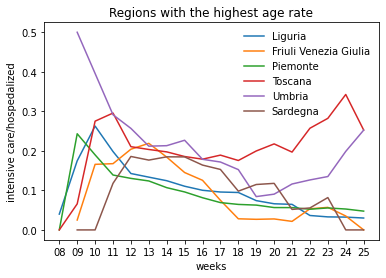

In [44]:
fig = plt.axes()
fig.patch.set_facecolor('white')
fig.plot(tableR01[['Liguria', 'Friuli Venezia Giulia', 'Piemonte', 'Toscana', 'Umbria', 'Sardegna']])
fig.set(xlabel='weeks', ylabel='intensive care/hospedalized', title='Regions with the highest age rate');
fig.legend(['Liguria', 'Friuli Venezia Giulia', 'Piemonte', 'Toscana', 'Umbria', 'Sardegna'], loc='upper right', frameon=False)

Below there is another table made by the provinces with more than 10000 total cases and their week trend. 

In [45]:
table3 = province[(province.totale_casi>10000) & (province.week<'26')].pivot_table('totale_casi', 
                                                                                   index = ['week'], 
                                                                                   columns = 'denominazione_provincia',
                                                                                   aggfunc=['sum'], fill_value = np.nan)

The corresponding plot shows clearly that Milan has the strongest growth trend. 

In general we noticed that there were no provinces with more than 10000 cases before the 13th week of the year. 

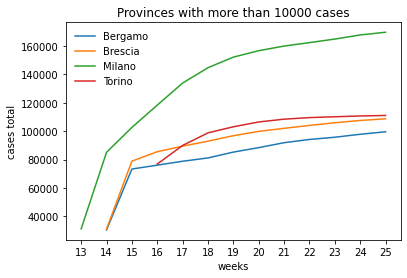

In [46]:
fig = plt.axes()
fig.patch.set_facecolor('white')
fig.plot(table3)
fig.set(xlabel='weeks', ylabel='cases total', title='Provinces with more than 10000 cases');
fig.legend(['Bergamo','Brescia','Milano','Torino'], loc='upper left', frameon=False)

We did a scatterplot matrix between all the variables of the 'regioni' DataFrame, but one of the most relevant scatterplot for us was the one which relates the number of swabs and the total positive cases, so we decided to display it only.

We saw that there is a strong positive relation between the two variables. We noticed that after the number of swabs reach about 300000, the number of positive cases detected decreases a little bit. 

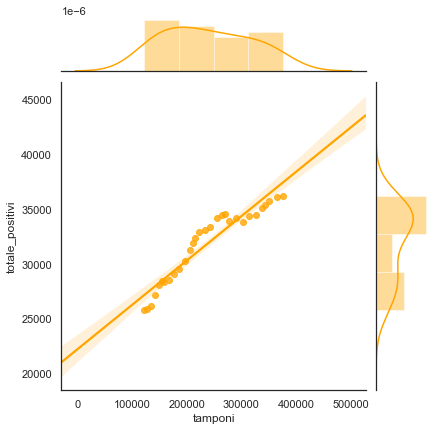

In [47]:
sns.set()
with sns.axes_style('white'):
    sns.jointplot("tamponi","totale_positivi", 
                  data=regioni[(regioni.month=='04') & (regioni.denominazione_regione == 'Lombardia')], 
                  kind='reg', color = 'orange')

Then we added other two scatterplots that use latitude and longitude information.

Here we could see the scatterplot of dead people (as size) on total cases (as color) in April. So in the north of Italy we have got bigger circles, indicating high number of deads on more than 40000 total cases.

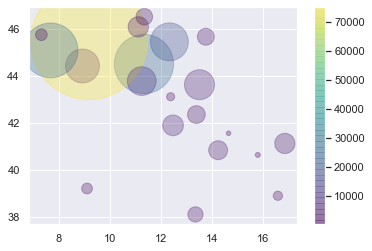

In [123]:
regioni_aprile = regioni[regioni['new_date']=='2020-04-29-17']
lat, lon = regioni_aprile['lat'], regioni_aprile['long']
dec, tot_casi = regioni_aprile['deceduti'], regioni_aprile['totale_casi'] 

plt.scatter(lon, lat, c = tot_casi, s = dec, alpha = 0.3, cmap ='viridis')
plt.colorbar()

Dealing with provinces we chose the number of total cases as size of circle. Colors were randomly assigned. 

Clearly on the norther provinces we have bigger circles because of their high number of total cases on April.

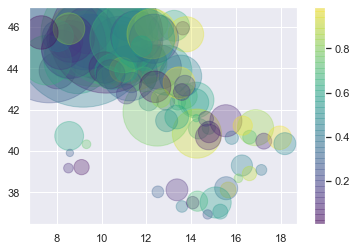

In [125]:
province_aprile = province[province['new_date']=='2020-04-29-17']
lat, lon = province_aprile['lat'], province_aprile['long']
tot_casi = province_aprile['totale_casi'] 
rng = np.random.RandomState(0)
colors = rng.rand(107)

plt.scatter(lon, lat, c = colors, s = tot_casi, alpha = 0.3, cmap ='viridis')
plt.colorbar()

We went on with our analysis building boxplots. There are many ways to construct them and we chose three methods.

The first is with the method *boxplot* from *matplotlib*.

We chose three variables ('deceduti', 'dimessi_guariti', 'nuovi_positivi'). We noticed there are a lot of outliers for each boxplot. Obviously they have different scales but what we can say is that the interquartile difference of the new positive cases is lower than the others.

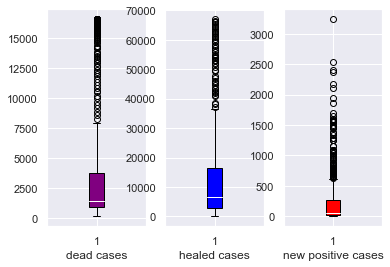

In [48]:
fig, ax =plt.subplots(1,3)
c = 'white'
ax[0].boxplot("deceduti", data=regioni[regioni.totale_casi>5000], boxprops = dict(facecolor = 'purple'),
              medianprops = dict(color = c), patch_artist = True)
ax[1].boxplot("dimessi_guariti", data=regioni[regioni.totale_casi>5000],  boxprops = dict(facecolor = 'blue'),
              medianprops = dict(color = c), patch_artist = True)
ax[2].boxplot("nuovi_positivi", data=regioni[regioni.totale_casi>5000],  boxprops = dict(facecolor = 'red'),
              medianprops = dict(color = c), patch_artist = True)
ax[0].set(xlabel = 'dead cases')
ax[1].set(xlabel = 'healed cases')
ax[2].set(xlabel = 'new positive cases')

plt.show()

The second method uses *pandas.boxplot*. Here we selected only the Lombardy region because it was the most hit region, looking at the same variables as before. This function directly includes the three boxplots in the same box, so they refers to the same scale.

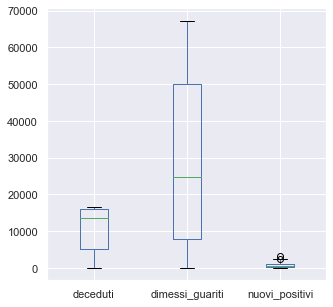

In [49]:
regioni[regioni['denominazione_regione']=='Lombardia'].boxplot(column=['deceduti', 'dimessi_guariti', 'nuovi_positivi'],
                                                               figsize = (5, 5))

The last method is *catplot* from *seaborn*. Here we managed to plot the new positive cases through the months for regions with more than 5000 total cases. We showed this result between the italian zones and we observed that with more than 5000 cases there were only the north and center of Italy that had new positive cases. In particular we observed that the north always dominates the center boxplots. Luckly we also see that the new positive cases decreses while the time goes by. 

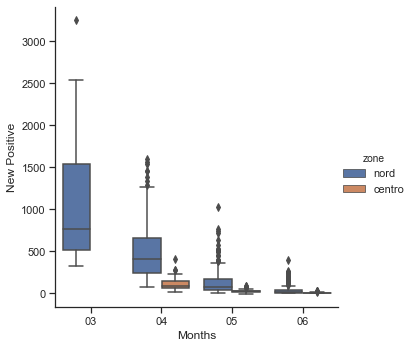

In [68]:
sns.set()

with sns.axes_style(style='ticks'):
    g = sns.catplot("month", "nuovi_positivi", "zone", data=regioni[regioni.totale_casi>5000], kind="box")
    g.set_axis_labels("Months", "New Positive")

# <font color='darkred'>Geographical representation</font>

With the use of *geopandas* package we were able to represent spatial data, which have a specific geometry. 

For an example we could plot the world map divided into countries. The world dataset with its geometry is already in *geopandas*.

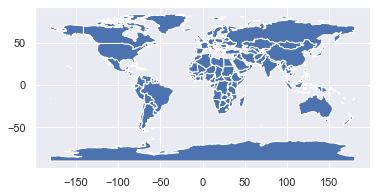

In [70]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# For attribute join
country_shapes = world[['geometry', 'iso_a3']]
country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]
countries = countries.rename(columns={'name':'country'})

countries.plot()

Using a **shapefile** got from https://www4.istat.it/it/archivio/209722 (detailed 2018 version), we were able to plot the Italy map divided into provinces areas.

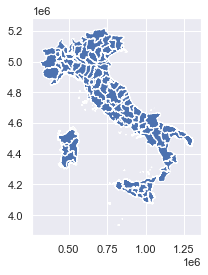

In [71]:
italy_map = gpd.read_file("C:\\Users\\ProvCM01012018_WGS84.shp")
italy_map.plot()

In order to merge the 'province' DataFrame with the 'italy_map' spatial data we renamed the 'sigla_provincia' column with 'SIGLA' as it is in the 'italy_map'.

In [73]:
province.rename(columns={'sigla_provincia':'SIGLA'}, inplace = True)
province_geo = italy_map.merge(province, on='SIGLA')

Here we created two subset of the merged DataFrame based on the months March and June.

In [116]:
province_marzo = province_geo[province_geo['new_date']=='2020-03-29-13']
province_giugno = province_geo[province_geo['new_date']=='2020-06-29-26']

From the two plots we could notice that there are differences in scales and in the intensity of the phenomenon among the provinces. 

For example we could see that in March the most hit provinces were Milan, Bergamo and Brescia with more the 8000 total cases.

34            Annotation(438311, 5.04148e+06, 'VC')
162           Annotation(950404, 4.53522e+06, 'NA')
289           Annotation(743368, 4.88046e+06, 'FC')
417      Annotation(1.14994e+06, 4.33197e+06, 'CZ')
545      Annotation(1.28199e+06, 4.48753e+06, 'LE')
                            ...                    
13089         Annotation(509255, 4.33978e+06, 'CA')
13217         Annotation(531426, 4.44794e+06, 'NU')
13345         Annotation(495221, 4.36432e+06, 'SU')
13473         Annotation(496903, 4.51062e+06, 'SS')
13601          Annotation(475835, 4.4266e+06, 'OR')
Length: 107, dtype: object

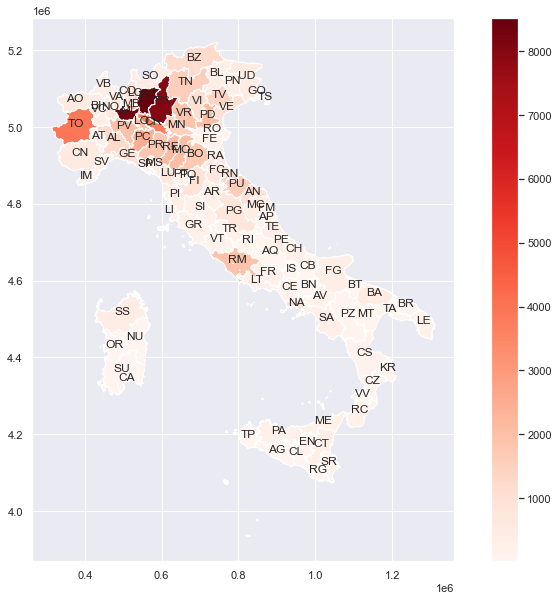

In [117]:
ax0 = province_marzo.plot(figsize = (13, 10), column='totale_casi', cmap='Reds', legend = True)
ax0
province_marzo.apply(lambda x: ax0.annotate(s = x.SIGLA, xy = x.geometry.centroid.coords[0], ha = 'center'), axis = 1)

On the other hand we could observe that in June Milan reached more than 20000 total cases becaming the most affected province, while Bergamo, Brescia and Torino have now about 15000 total cases. 

In this last month we could see that all total cases grew up in the north of Italy more than in the other zones, except from Rome that has a number of total cases almost equal to Milan in March.

126           Annotation(438311, 5.04148e+06, 'VC')
254           Annotation(950404, 4.53522e+06, 'NA')
381           Annotation(743368, 4.88046e+06, 'FC')
509      Annotation(1.14994e+06, 4.33197e+06, 'CZ')
637      Annotation(1.28199e+06, 4.48753e+06, 'LE')
                            ...                    
13181         Annotation(509255, 4.33978e+06, 'CA')
13309         Annotation(531426, 4.44794e+06, 'NU')
13437         Annotation(495221, 4.36432e+06, 'SU')
13565         Annotation(496903, 4.51062e+06, 'SS')
13693          Annotation(475835, 4.4266e+06, 'OR')
Length: 107, dtype: object

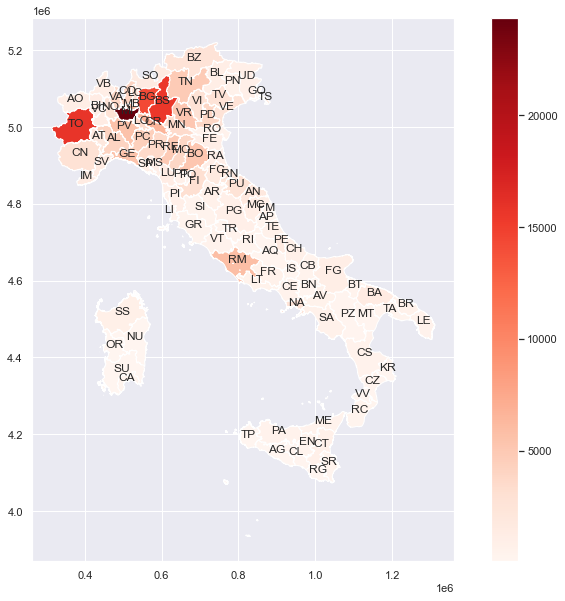

In [119]:
ax1 = province_giugno.plot(figsize = (13, 10), column='totale_casi', cmap='Reds', legend = True)
ax1
province_giugno.apply(lambda x: ax1.annotate(s = x.SIGLA, xy = x.geometry.centroid.coords[0], ha = 'center'), axis = 1)

### The end

We enjoyed working on Jupyter notebook, exploring different libraries and we found it useful for our future. 